In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Theanmp,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7825 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12760 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
for values in df.columns:
    print(df[values].value_counts())
    print("*"*10)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
**********
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
**********
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
**********
size
2 BHK         5199
3 BHK         4310
4

In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12760.000000,13320.000000
mean,2.692610,40.609561,112.565627
std,1.341458,156.332491,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,999.000000,3600.000000


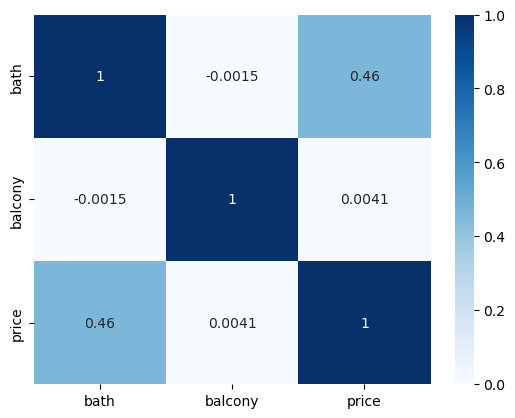

In [8]:
num_vars = ["bath","balcony","price"]
sns.heatmap(df[num_vars].corr(),annot = True,cmap = "Blues")
plt.show()

In [9]:
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.253754
total_sqft       0.000000
bath             0.548048
balcony          4.204204
price            0.000000
dtype: float64

<Axes: >

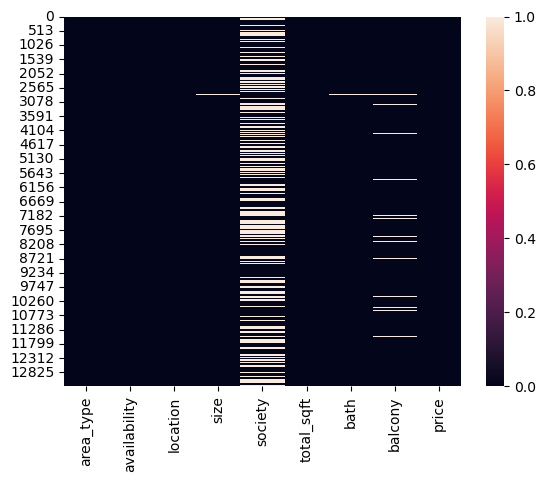

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.drop(["balcony","society","area_type","availability"],axis = 1,inplace = True)

In [12]:
df.isnull().mean()


location      0.000075
size          0.001201
total_sqft    0.000000
bath          0.005480
price         0.000000
dtype: float64

In [13]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
# Feature Engineering: Create 'bhk' from 'size'
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [17]:
# Convert 'total_sqft' to numeric
def convert_sqft_to_num(x):
    try:
        return float(x)
    except:
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df.dropna()

In [18]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

******* total_sqft *******


C:\Users\Sajjad\AppData\Local\Temp\ipykernel_16724\3312526567.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


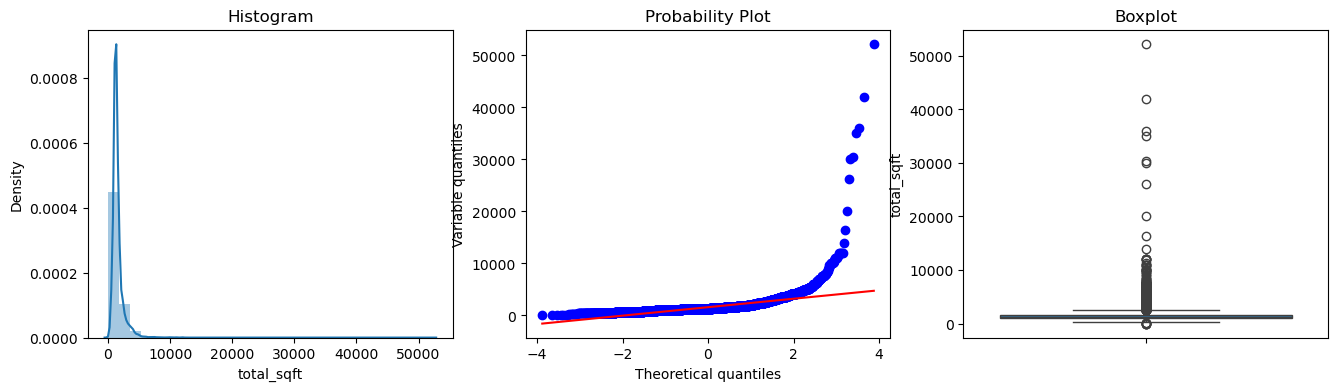

******* bath *******


C:\Users\Sajjad\AppData\Local\Temp\ipykernel_16724\3312526567.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


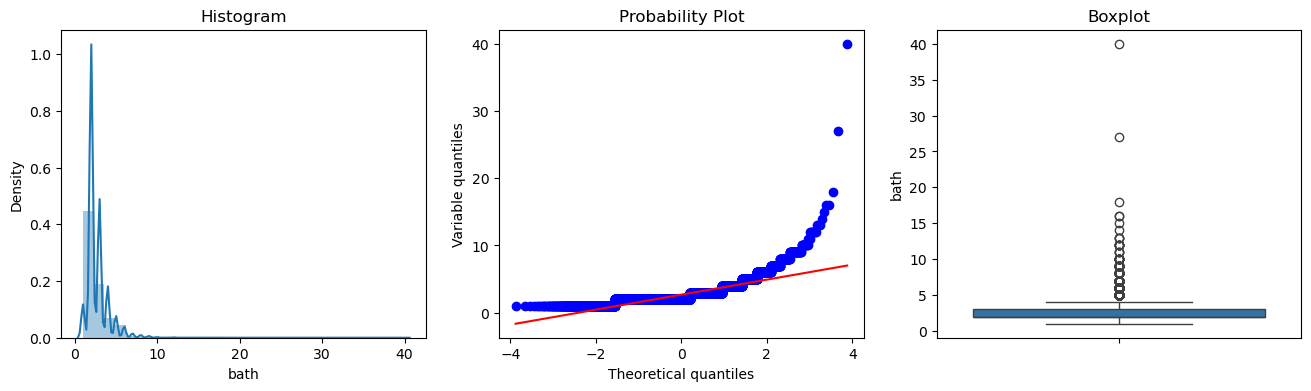

******* price *******


C:\Users\Sajjad\AppData\Local\Temp\ipykernel_16724\3312526567.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


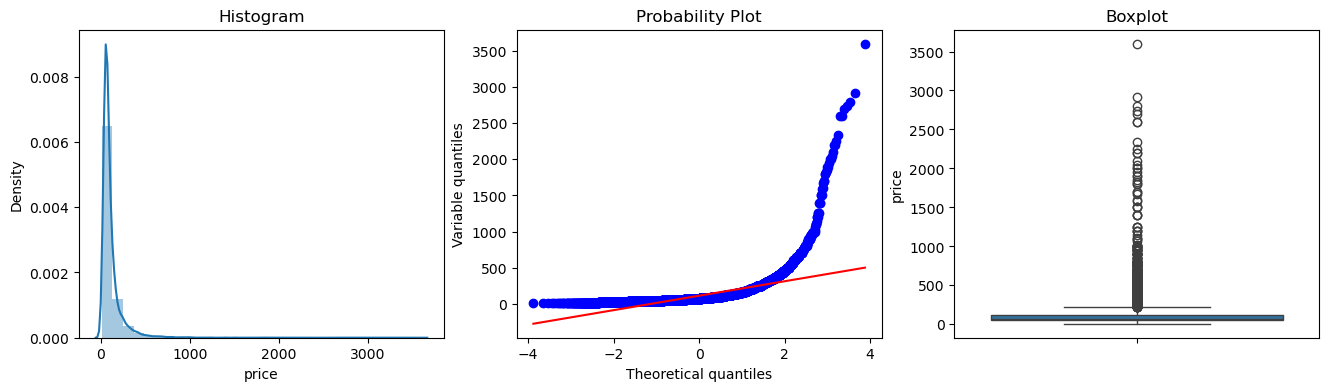

******* bhk *******


C:\Users\Sajjad\AppData\Local\Temp\ipykernel_16724\3312526567.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


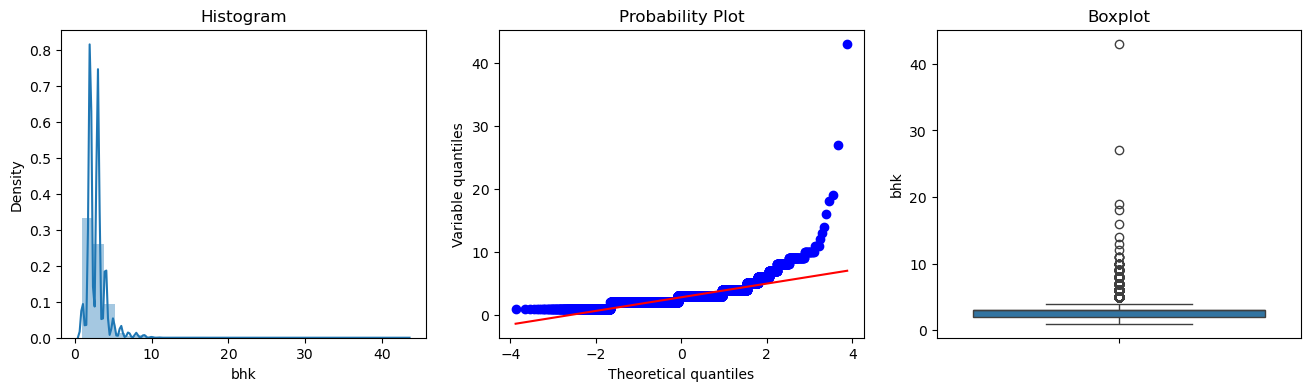

In [19]:
num_var = ["total_sqft","bath","price","bhk",]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df, var)

# here we observe outlier using histogram,, qq plot and boxplot 

# Remove outliers


In [21]:
df = df[df['total_sqft'] / df['bhk'] >= 300]

#  Price per square foot (optional)


In [23]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']


# Clean 'location'


In [25]:
df['location'] = df['location'].apply(lambda x: x.strip())
loc_stats = df['location'].value_counts()
locations_less_than_10 = loc_stats[loc_stats <= 10]
df['location'] = df['location'].apply(lambda x: 'other' if x in locations_less_than_10 else x)


# One-hot encode 'location'


In [27]:
dummies = pd.get_dummies(df['location'], drop_first=True)
df_model = pd.concat([df.drop(['location', 'size', 'price_per_sqft'], axis=1), dummies], axis=1)


# Features and target


In [29]:
X = df_model.drop('price', axis=1)
y = df_model['price']

# Train-test split


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor


# XGBoost Regressor


In [34]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation


In [36]:
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.588954546218971
RMSE: 100.23095462073891


# RandomForest Regressor


In [38]:
random_r = RandomForestRegressor()
random_r.fit(X_train, y_train)
y_pred = random_r.predict(X_test)

# Evaluation

In [40]:
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.5934536693723372
RMSE: 99.68090330236652


# Linear Regression


In [42]:
linear_r =LinearRegression()
linear_r.fit(X_train, y_train)
y_pred = linear_r.predict(X_test)

# Evaluation

In [44]:
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.5314732214113325
RMSE: 107.009947520743


# We Choose XGB Model becouse it,s Accuracy is best 

In [46]:
import pickle 

In [47]:

# Save trained model
with open('price_predict_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save column names used in training
with open('columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)
